In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import joinedload, selectinload

In [60]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [62]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [63]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [64]:
# Create our session (link) from Python to the DB
ses = Session(engine)

# Exploratory Precipitation Analysis

In [65]:
# Find the most recent date in the data set.
recent_date = ses.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

([<matplotlib.axis.XTick at 0x20eddffee90>,
 [Text(0.0, 0, '2016-08-23'),
  Text(78.0, 0, '2016-11-09'),
  Text(158.0, 0, '2017-01-28'),
  Text(248.0, 0, '2017-04-28'),
  Text(321.0, 0, '2017-07-10')])

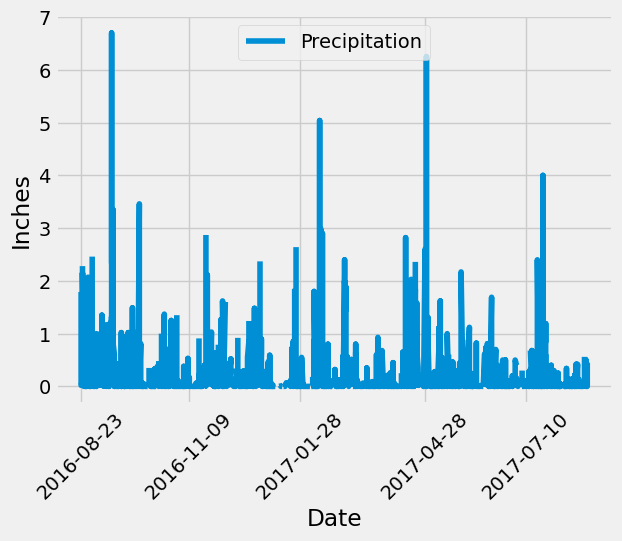

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
months_twelve = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
retrive = [] #using a list to not have a lot of jumble spwew out
retrive = session.query(measurement.date,measurement.prcp).filter(measurement.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(retrive, columns=['Date', 'Precipitation'])



# Sort the dataframe by date
df_sorted = precip_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df_sorted['Date'], df_sorted['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc = 'upper center')

dates = ['2016-08-23','2016-11-09','2017-01-28','2017-04-28','2017-07-10']
plt.xticks(dates, rotation=45)

In [89]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [93]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active =[session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').first()]
most_active

[(54.0, 85.0, 71.66378066378067)]

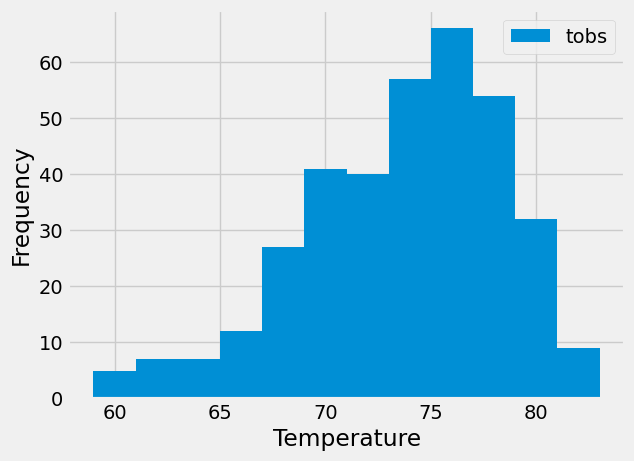

In [112]:
acitve_months = session.query(measurement.tobs).filter(measurement.station== 'USC00519281').filter(measurement.date >='2016-08-18').all()
temps = [result.tobs for result in acitve_months]
plt.hist(temps, bins = 12, label= 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Close Session

In [113]:
# Close Session
session.close()